Please upload your image...


Saving Maruf.jpg to Maruf (6).jpg
Processing the image...
Processed image saved as processed_image.jpg
Visualizing the original and processed images...


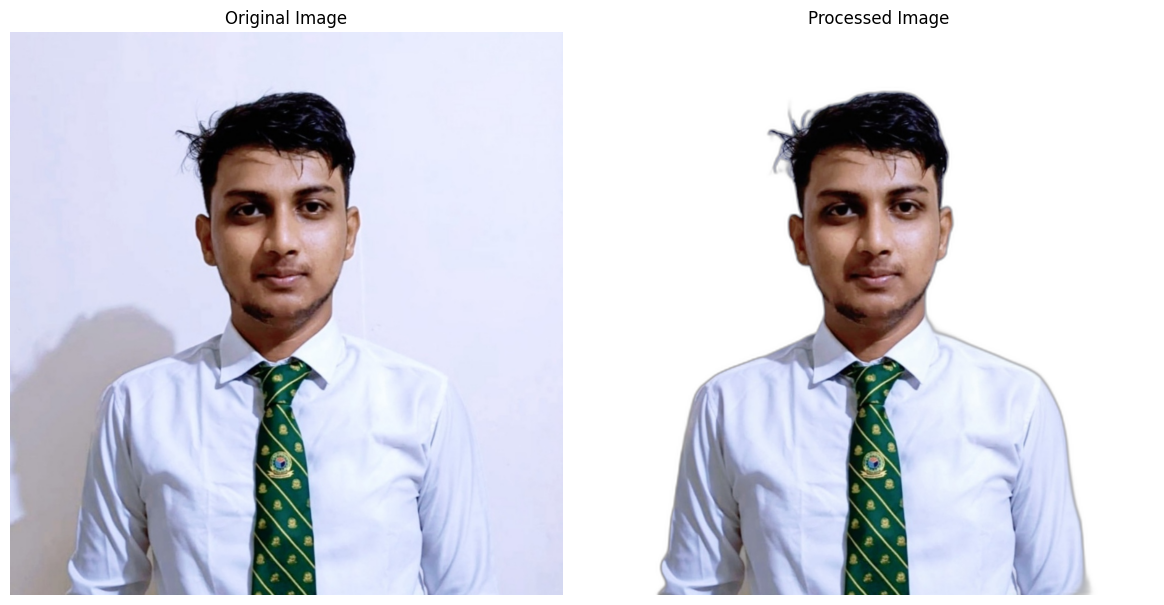

Download should start shortly...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
# Install necessary packages
!pip install rembg pillow matplotlib
!pip install onnxruntime

# Import necessary libraries
from google.colab import files
from PIL import Image
from rembg import remove
import io
import matplotlib.pyplot as plt

# Function to remove background and add white background
def remove_background_and_add_white(input_path, output_path):
    # Open the uploaded image
    print("Processing the image...")
    with open(input_path, "rb") as file:
        input_image = file.read()

    # Remove the background using rembg
    result = remove(input_image)

    # Convert the result to a PIL Image
    image = Image.open(io.BytesIO(result)).convert("RGBA")

    # Create a white background
    white_bg = Image.new("RGBA", image.size, (255, 255, 255, 255))

    # Composite the image onto the white background
    final_image = Image.alpha_composite(white_bg, image)

    # Convert to RGB (to remove alpha channel) and save
    final_image = final_image.convert("RGB")
    final_image.save(output_path)
    print(f"Processed image saved as {output_path}")

    return final_image

# Upload the image to the runtime
print("Please upload your image...")
uploaded = files.upload()

# Get the uploaded file name
input_path = list(uploaded.keys())[0]

# Define the output file name
output_path = "processed_image.jpg"

# Process the image and get the processed result
processed_image = remove_background_and_add_white(input_path, output_path)

# Visualize the original and processed images
print("Visualizing the original and processed images...")
original_image = Image.open(input_path).convert("RGB")

# Plotting the images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

# Processed image
plt.subplot(1, 2, 2)
plt.imshow(processed_image)
plt.title("Processed Image")
plt.axis("off")

# Show the plot
plt.tight_layout()
plt.show()

# Download the processed image
print("Download should start shortly...")
files.download(output_path)
